# **Project Name** - FedEx Business Analysis

**Project Type** - EDA

**Contribution** - Shivangi Gupta

# **Project Summary**

This project focuses on analyzing global pharmaceutical shipment data to uncover insights that can support strategic decision-making in supply chain optimization, vendor selection, and risk mitigation.

**Objective**
To explore patterns in shipment logistics, vendor contributions, insurance costs, and product distribution using visual analytics, and to derive actionable business insights that can drive operational efficiency.

**Key Analyses Conducted**
- **Shipment Distribution by Country:** Identified top receiving countries by shipment frequency and volume.

- **Vendor and Manufacturing Site Analysis:** Assessed supplier dominance and manufacturing location trends.

- **Brand Distribution:** Evaluated brand usage concentration, revealing heavy reliance on generics.

- **INCO Terms and Vendor Terms:** Analyzed shipping agreements and vendor contributions to understand logistic preferences.

- **Shipment Mode vs. Line Item Value:** Highlighted how specific transportation methods contribute disproportionately to overall shipment value.

- **Insurance vs. Weight Analysis:** Investigated the relationship between shipment weight and insurance cost, showing a positive trend.

# **Github Link**

https://github.com/Shivi2599/Labmentix-Internship-Projects/tree/main/FedEx

# **Problem Statement**

This project focuses on understanding and improving delivery performance using shipment history data from FedEx. The primary objective was to explore and analyze key factors influencing on-time deliveries and associated costs, such as freight charges and line item insurance. The analysis aims to offer valuable insights for operational improvement and informed decision-making.


#### **Define Your Business Objective?**

The first step was to understand the broader business questions and assumptions. The analysis was guided by several core queries:

- Are shipments managed by specific teams (e.g., PMO – US) more likely to be delivered on time?

- Does the mode of shipment (air, sea, etc.) affect delivery performance?

- Do certain countries face more frequent delays?

- Is there a relationship between the shipment mode and frequency of on-time deliveries?

- Does the time gap between the PO Sent to Vendor Date and the Scheduled Delivery Date influence delivery performance?

We also explored whether the weight of shipments affected the insurance cost and if INCO terms had any significant impact on vendor delivery reliability.

# ***Let's Begin !***

### Import Libraries

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [46]:
data = pd.read_csv("/content/drive/MyDrive/Labmentix Internship/FedEx Business Analysis/SCMS_Delivery_History_Dataset.csv")

### Dataset First View

In [47]:
data.head(2) # Dataset First View

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.0,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.2,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN


In [48]:
data.tail(2) # Dataset tail view

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
10322,86822,200-ZW-T30,FPQ-16523,SO-51680,DN-4334,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,17465,113871.80,6.52,0.11,Mylan (formerly Matrix) Nashik,Yes,1392,Freight Included in Commodity Cost,134.03
10323,86823,103-ZW-T30,FPQ-15197,SO-50022,DN-4336,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,36639,72911.61,1.99,0.03,"Cipla, Goa, India",No,Weight Captured Separately,Freight Included in Commodity Cost,85.82


### Dataset Rows and Columns Count

In [49]:
data.shape  # Dataset Rows & Columns count

(10324, 33)

### Dataset Information

In [50]:
data.info() # Dataset Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

### Duplicate Values

In [51]:
data.duplicated().sum()  # Dataset Duplicate Value Count

data.drop_duplicates(inplace= True) # Remove Duplicates

No duplicates were found in the dataset.

#### Missing Values/Null Values

In [52]:
data.isnull().sum() # Missing Values Count

,0
ID,0
Project Code,0
PQ #,0
PO / SO #,0
ASN/DN #,0
Country,0
Managed By,0
Fulfill Via,0
Vendor INCO Term,0
Shipment Mode,360


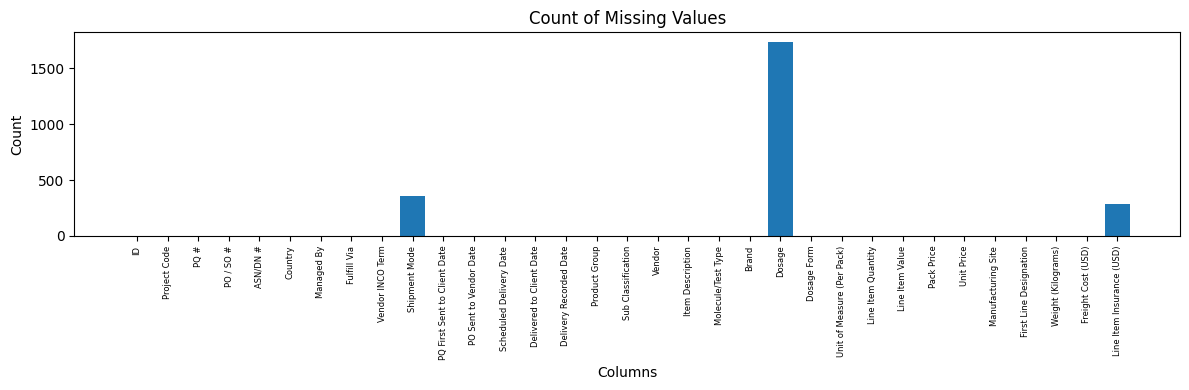

In [53]:
# Visualizing the missing values

plt.figure(figsize = (12,4))
plt.bar(x = data.isnull().sum().index, height=data.isnull().sum().values)
plt.xticks(rotation = 90, fontsize= 6)
plt.title("Count of Missing Values")
plt.xlabel("Columns")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

In [54]:
## Removing Leading Whitespace from column names
data.columns.str.strip()


## Fill missing values in 'Shipment Mode' using mode per combination of Country,
# Managed By, and Fulfill Via
data['Shipment Mode'] = data.groupby(['Country', 'Managed By', 'Fulfill Via'])['Shipment Mode']\
                        .transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))

# The 'Dosage' column contains missing values primarily where the Dosage Form is
# 'Test Kit'. Since dosage information is irrelevant for such products, these
# null values are left unchanged as they represent true missingness due to
# non-applicability.

                           ## Line item Insurance ##
# Calculate Insurance Rate
data['Insurance Rate'] = data['Line Item Insurance (USD)'] / data['Line Item Value']

# Define the group columns
group_cols = [
    'Country', 'Managed By', 'Fulfill Via', 'Vendor INCO Term',
    'Shipment Mode', 'Product Group', 'Sub Classification', 'Vendor',
    'Brand', 'Unit of Measure (Per Pack)'
]

# Calculate average insurance rate per group (excluding missing values)
group_avg = (
    data[data['Line Item Insurance (USD)'].notnull()]
    .groupby(group_cols)['Insurance Rate']
    .mean()
    .reset_index()
    .rename(columns={'Insurance Rate': 'Avg Insurance Rate'})
)

# Merge back the average rates into the original dataframe
data = data.merge(group_avg, on=group_cols, how='left')

# Fill missing insurance with estimated value
data['Line Item Insurance (USD)'] = data.apply(
    lambda row: row['Avg Insurance Rate'] * row['Line Item Value']
    if pd.isnull(row['Line Item Insurance (USD)']) else row['Line Item Insurance (USD)'],
    axis=1
)

# Drop the helper columns if desired
data.drop(columns=['Insurance Rate', 'Avg Insurance Rate'], inplace=True)

# Save the updated dataframe
data.to_excel('updated_insurance_estimates.xlsx', index=False)


### What did you know about your dataset?

The dataset contains records of shipment transactions managed by FedEx, with detailed information on **logistics, products, costs, and delivery timelines.**

Initial inspection reveals that the dataset includes:

- **Temporal attributes** such as PO Sent Date, Scheduled Delivery Date, and Delivered Date.

- **Categorical features** like Country, Vendor, Product Group, Shipment Mode, and INCO Terms.

- **Financial and quantitative columns** including Line Item Value, Freight Cost (USD), and Line Item Insurance (USD).

- **Unique identifiers** such as ASN/DN #, PO/SO #, and Project Code for tracking orders.

There are approximately **10324 records** (rows) in the dataset, each representing a unique line item of a shipment.

Some columns may require **data cleaning and standardization**, such as:

- **Inconsistent formatting** in date columns.

- **Mixed casing** in column names and categorical values.

- **Missing values in fields** like Line Item Insurance (USD), Freight Cost (USD), and Shipment Mode, which need thoughtful imputation based on domain knowledge.

The dataset is structured in **tabular format**, ideal for exploratory data analysis.

It provides a strong foundation for answering business questions related to **delivery performance, shipment cost analysis, insurance estimation, and vendor reliability.**



## ***2. Understanding Your Variables***

In [55]:
# Dataset Columns

data.columns

Index(['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)'],
      dtype='object')

In [56]:
# Dataset Describe

data.describe()

,ID,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Line Item Insurance (USD)
count,10324.000000,10324.000000,10324.000000,1.032400e+04,10324.000000,10324.000000,10248.000000
mean,51098.968229,77.990895,18332.534870,1.576506e+05,21.910241,0.611701,238.420987
std,31944.332496,76.579764,40035.302961,3.452921e+05,45.609223,3.275808,496.468709
min,1.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,12795.750000,30.000000,408.000000,4.314593e+03,4.120000,0.080000,6.647500
50%,57540.500000,60.000000,3000.000000,3.047147e+04,9.300000,0.160000,47.374240
75%,83648.250000,90.000000,17039.750000,1.664471e+05,23.592500,0.470000,251.570000
max,86823.000000,1000.000000,619999.000000,5.951990e+06,1345.640000,238.650000,7708.440000


### Variables Description

| **Column Name**                     | **Description** |
|------------------------------------|-----------------|
| **ID**                             | Unique identifier for each row/record. |
| **Project Code**                   | Code representing the project or initiative tied to shipment. |
| **PQ #**                           | Price Quotation reference number. |
| **PO / SO #**                      | Purchase Order or Sales Order associated with the shipment. |
| **ASN/DN #**                       | Advanced Shipment Notice or Delivery Note refernce; uniquely identifies the shipment. |
| **Freight Cost (USD)**            | Shipping cost in US Dollars for the line item. |
| **Weight (Kilograms)**            | Total weight of the shipment for the line item. |
| **Country**                        | Destination country for the shipment. |
| **Managed By**                     | Internal team managing the order or shipment. |
| **Fulfill Via**                    | Fulfillment route, e.g., direct drop or distribution hub. |
| **Vendor INCO Term**              | International Commercial Terms used to define shipping responsibilities (e.g., EXW, FOB). |
| **Shipment Mode**                 | Method of shipment — Air, Ocean, Truck, Air Charter. |
| **PQ First Sent to Client Date**  | Date the first price quotation was sent to the client. |
| **PO Sent to Vendor Date**        | Date the purchase order was sent to the vendor. |
| **Scheduled Delivery Date**       | The planned delivery date for the delivery. |
| **Delivered to Client Date**      | The actual date the shipment was delivered to the client. |
| **Delivery Recorded Date**        | Date when delivery was officially recorded in the system. |
| **Product Group**                 | High-level category of the product (e.g., HRDT, medical supplies). |
| **Sub Classification**            | More specific classification within the product group. |
| **Vendor**                         | Name of the supplier/vendor fulfilling the order. |
| **Brand**                          | Product brand name. |
| **Dosage**                         | Dosage value, if applicable (may be N/A for test kits). |
| **Dosage Form**                    | Form in which the drug/product is delivered (e.g., tablet, test kit). |
| **Unit of Measure (Per Pack)**     | Quantity or measure of items contained per pack. |
| **Line Item Quantity**             | Number of units/packs ordered for that item. |
| **Line Item Value**                | Total value of the line item (Line Item Quantity × Pack Price). |
| **Pack Price**                     | Price per pack/unit as defined in the PO. |
| **Unit Price**                     | Price per individual unit of the item. |
| **Line Item Insurance (USD)**      | Insurance cost for the line item, if applicable. |


### Check Unique Values for each variable.

In [57]:
# Check Unique Values for each variable.

for i in data.columns.tolist():
  print(i,"=",data[i].nunique(),".")

ID = 10324 .
Project Code = 142 .
PQ # = 1237 .
PO / SO # = 6233 .
ASN/DN # = 7030 .
Country = 43 .
Managed By = 4 .
Fulfill Via = 2 .
Vendor INCO Term = 8 .
Shipment Mode = 4 .
PQ First Sent to Client Date = 765 .
PO Sent to Vendor Date = 897 .
Scheduled Delivery Date = 2006 .
Delivered to Client Date = 2093 .
Delivery Recorded Date = 2042 .
Product Group = 5 .
Sub Classification = 6 .
Vendor = 73 .
Item Description = 184 .
Molecule/Test Type = 86 .
Brand = 48 .
Dosage = 54 .
Dosage Form = 17 .
Unit of Measure (Per Pack) = 31 .
Line Item Quantity = 5065 .
Line Item Value = 8741 .
Pack Price = 1175 .
Unit Price = 183 .
Manufacturing Site = 88 .
First Line Designation = 2 .
Weight (Kilograms) = 4688 .
Freight Cost (USD) = 6733 .
Line Item Insurance (USD) = 6912 .


## 3. ***Data Wrangling***

In [58]:
# Write your code to make your dataset analysis ready.

from dateutil.parser import parse

def safe_parse_mixed_dates(date_value):
    try:
        return parse(str(date_value), dayfirst=True, fuzzy=True)
    except:
        return pd.NaT # Not a Number

data['PO Sent to Vendor Date'] = data['PO Sent to Vendor Date'].apply(safe_parse_mixed_dates)

# Convert columns = (PO Sent to Vendor Date, Scheduled Delivery Date, Delivered
# to Client Date) to datetime if it's stored as object due to mixed types

data['Scheduled Delivery Date'] = pd.to_datetime(data['Scheduled Delivery Date'], dayfirst=True)
data['Delivered to Client Date'] = pd.to_datetime(data['Delivered to Client Date'], dayfirst = True)
data['PO Sent to Vendor Date'] = pd.to_datetime(data['PO Sent to Vendor Date'], errors='coerce',dayfirst=True)

# Creating a new column "PO_date_sent" which says either date is captured or
# not
data['PO_date_sent']=0
for i in range(data.shape[0]):

    if data['PO Sent to Vendor Date'].loc[i]  in ['N/A - From RDC' ,'Date Not Captured']:
        data['PO_date_sent'].loc[i]=data['PO Sent to Vendor Date'].loc[i]

    else :
        data['PO_date_sent'].loc[i]="Date Captured"

In [59]:
import re  # Regular Expression

# Function to extract ASN/DN from the string
def extract_reference(asn_string):
    match = re.search(r"(ASN|DN)[-–]\d+", str(asn_string), re.IGNORECASE ) # This turns "See ASN-18805 (ID#:18997)" → into "ASN-18805"
    return match.group(0).upper() if match else np.nan  # Retrieves the full matched string from the regex.
                                                        # upper() Converts that string to uppercase.

## FREIGHT COST COLUMN ##

# Find all rows with non-numeric Freight Cost
non_numeric_mask = data['Freight Cost (USD)'].astype(str).str.contains("see", case=False, na=False)

# Extract the referenced ASN/DN value
data.loc[non_numeric_mask, 'Referenced ASN'] = data.loc[non_numeric_mask, 'Freight Cost (USD)'].apply(extract_reference)

# For each referenced ASN/DN, get the numeric freight cost from correct ASN
for asn in data['Referenced ASN'].dropna().unique():
    # Get the correct value for that ASN/DN
    correct_value = data.loc[(data['ASN/DN #'] == asn) & (pd.to_numeric(data['Freight Cost (USD)'], errors='coerce').notnull()), 'Freight Cost (USD)'
    ].iloc[0] if not data.loc[
        (data['ASN/DN #'] == asn) &
        (pd.to_numeric(data['Freight Cost (USD)'], errors='coerce').notnull())
    ].empty else np.nan

    # Replace "see ASN-XXXX" with the actual value
    data.loc[data['Referenced ASN'] == asn, 'Freight Cost (USD)'] = correct_value

# Clean up - convert to numeric and drop helper column
data['Freight Cost (USD)'] = pd.to_numeric(data['Freight Cost (USD)'], errors='coerce')
data.drop(columns=['Referenced ASN'], inplace=True)



## WEIGHT (KILOGRAMS) COLUMN ##

# Find all rows with non-numeric Freight Cost
non_numeric_mask = data['Weight (Kilograms)'].astype(str).str.contains("see", case=False, na=False)

# Extract the referenced ASN/DN value
data.loc[non_numeric_mask, 'Referenced ASN'] = data.loc[non_numeric_mask, 'Weight (Kilograms)'].apply(extract_reference)

# For each referenced ASN/DN, get the numeric freight cost from correct ASN
for asn in data['Referenced ASN'].dropna().unique():
    # Get the correct value for that ASN/DN
    correct_value = data.loc[
        (data['ASN/DN #'] == asn) &
        (pd.to_numeric(data['Weight (Kilograms)'], errors='coerce').notnull()),
        'Weight (Kilograms)'
    ].iloc[0] if not data.loc[
        (data['ASN/DN #'] == asn) &
        (pd.to_numeric(data['Weight (Kilograms)'], errors='coerce').notnull())
    ].empty else np.nan

    # Replace "see ASN-XXXX" with the actual value
    data.loc[data['Referenced ASN'] == asn, 'Weight (Kilograms)'] = correct_value

# Clean up - convert to numeric and drop helper column
data['Weight (Kilograms)'] = pd.to_numeric(data['Weight (Kilograms)'], errors='coerce')
data.drop(columns=['Referenced ASN'], inplace=True)


In [60]:
# Boolean flag indicating whether the shipment was delivered on time.
data['On Time Delivery'] = data['Delivered to Client Date'] <= data['Scheduled Delivery Date']

# how late or early the delivery was compared to the schedule.
data['delivery delay'] = (data['Delivered to Client Date'] - data['Scheduled Delivery Date']).dt.days

# The planned time between placing an order and expected delivery.
data['lead time'] = (data['Scheduled Delivery Date'] - data['PO Sent to Vendor Date']).dt.days

In [61]:
data['lead_time_issue']= data['lead time'] < 0
## This shows that the scheduled delivery date is earlier than the date the PO was sent — which is logically invalid.

In [62]:
# Drop invalid one
data = data[data['lead_time_issue'] == False]
 # lead time should always be positive
data.shape

(9892, 38)

In [63]:
df = data[data['Delivered to Client Date'] < data['PO Sent to Vendor Date']]
df
# Delivery Delay is -370, which makes no logical sense unless the actual
# delivery date was more than a year before the scheduled delivery date, which
# contradicts the typical flow.

data = data[~data['ID'].isin([4190])]

In [64]:
data['delo']= data['delivery delay'] < -100

## Drop rows where delivery delay is highly negative (e.g., less than -100)
data = data[data['delo'] == False]

### What all manipulations have you done and insights you found?

**Data Cleaning and Manipulations**
- **Handling Missing Values**
  
  * Missing values in **Shipment Mode** were imputed using mode within groups defined by `Country`, `Managed By`, `Fulfill Via.`

  * The **Dosage** column contains missing values primarily where the Dosage Form is `'Test Kit'`. Since dosage information is irrelevant for such products, these null values are left unchanged as they represent true missingness due to non-applicability.

  * Addressed missing **Line Item Insurance (USD)** values by calculating **average insurance rates** based on Line Item Value within groups (e.g., 'Country', 'Managed By', 'Fulfill Via', 'Vendor INCO Term','Shipment Mode', 'Product Group', 'Sub Classification', 'Vendor','Brand', 'Unit of Measure (Per Pack)'), and applying those rates where missing.
              Insurance Rate = (Line Item Insurance)/(Line Item Value)


- **Standardized Date Columns**
    * Some records in the `PO Sent to Vendor Date` column were labeled as `"From RDC"`, indicating that shipments originated from a **Regional Distribution Center** and were not sent directly by a vendor. These values were treated as missing (`NaT`) during analysis to preserve consistency in date calculations.

    * Converted **mixed-format date column** like `PO Sent to Vendor Date` (DMY, MDY) to proper datetime using custom parsing logic.

    * Ensured all date columns were converted to a consistent format (yyyy-mm-dd).

- **Corrected Data Entries**

    * Replaced textual entries like "see DN -304 (ID# 18199)" in `Freight Cost (USD)` and `Weight (Kilograms)` with actual numeric values.

- **Created New Columns**
    - **lead time**

        `lead time = Scheduled Delivery Date - PO Sent to Vendor Date`

      Negative lead times were identified as cases where the scheduled delivery date was earlier than the PO sent date.
      
      These rows were flagged for data quality issues and excluded from lead time performance metrics to ensure accuracy.
    - **Delivery Delay**

      `Delivery Delay = Delivered to Client date - Scheduled Delivery Date`

      Drop rows where delivery delay is highly negative (e.g., less than -100)
      
    - **On Time Delivery (Boolean)**
       
      A Boolean flag indicating whether the shipment was delivered on time.

      `True` →  Delivered on or before the scheduled date.

      `False`→Delivered after the scheduled date.








## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [65]:
# Total Orders

total_orders = data['ID'].count()
print(f"Total Orders: {total_orders}")

Total Orders: 9714


In [66]:
# Categorical column
categ_col = data.select_dtypes(include=['object']).columns

# Numerical column
num_col = data.select_dtypes(exclude=['object']).columns

# Datetime column
date_col = data.select_dtypes(include=['datetime64[ns]']).columns

num_col

Index(['ID', 'PO Sent to Vendor Date', 'Scheduled Delivery Date',
       'Delivered to Client Date', 'Unit of Measure (Per Pack)',
       'Line Item Quantity', 'Line Item Value', 'Pack Price', 'Unit Price',
       'Weight (Kilograms)', 'Freight Cost (USD)', 'Line Item Insurance (USD)',
       'On Time Delivery', 'delivery delay', 'lead time', 'lead_time_issue',
       'delo'],
      dtype='object')

#### **Univariate Analysis**



---



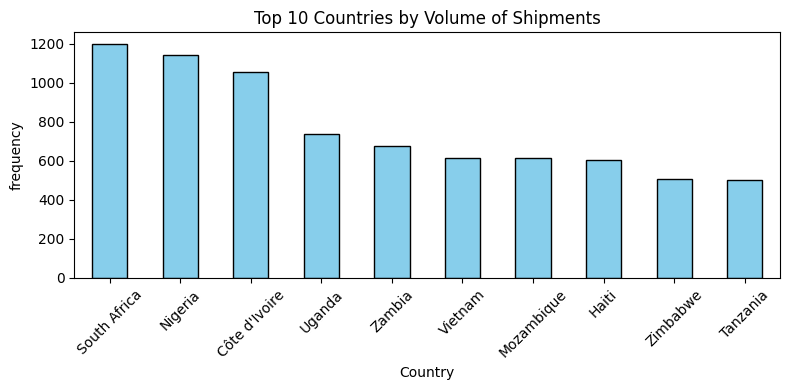

In [67]:
# barplot for categorical columns

categ_columns = ['Country','Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode','Product Group', 'Vendor',
       'Molecule/Test Type', 'Brand','Manufacturing Site']

plt.figure(figsize = (8,4))
data['Country'].value_counts().head(10).plot(kind = 'bar', color='skyblue', edgecolor='black')
plt.title(f"Top 10 Countries by Volume of Shipments")
plt.xlabel('Country')
plt.ylabel('frequency')
plt.xticks(rotation = 45)

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

- It was selected to visualize the horizontal comparison of the **top 10 countries** with the **most shipment records**.


##### 2. What is/are the insight(s) found from the chart?

- The bar plot shows that countries like **South Africa, Vietnam, and Haiti** account for the highest shipment volumes, indicating that these are the primary distribution targets.
- Prioritizing delivery efficiency in these regions could significantly impact overall performance.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Indentifying the top countries of highest volume of shipment allows the business to  prioritize logistics, marketing, and resource allocation.
- Negotiate better contracts in these countries.

**Risk**
- Overdependence on a few countries poses risk if trade policies or demand shift.
- Smaller volume markets might get neglected due to lack of potential growth.



---



In [68]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Create subplots
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]],
                    subplot_titles=['Shipment Mode Distribution', 'Managed By Distribution'])

# pie chart for "Shipment Mode"
df_mode = data['Shipment Mode'].value_counts().reset_index()
df_mode.columns = ['Shipment Mode', 'Count']

fig.add_trace(go.Pie(labels=df_mode['Shipment Mode'],
                     values=df_mode['Count'],
                     name='Shipment Mode'),
              row=1, col=1)


# pie chart for "Managed By"
df_managed = data['Managed By'].value_counts().reset_index()
df_managed.columns = ['Managed By', 'Count']

fig.add_trace(go.Pie(labels=df_managed['Managed By'],
                     values=df_managed['Count'],
                     name='Managed By'),
              row=1, col=2)

fig.update_traces(hole=0.3, textinfo='percent+label', textposition='outside', rotation = 215)

fig.update_layout(title_text='Shipment Mode & Managed By Distribution',
                  height=400, width=1100)

fig.show()

##### 1. Why did you pick the specific chart?

- Pie charts to compare the data and to analyze which data is bigger or smaller in **Shipment mode and managed by Distribution.**

##### 2. What is/are the insight(s) found from the chart?

**Shipment Mode Distribution**
- Most shipments are done through **air** mode i.e **60.4%** shipments.

- **29.2%** shipments were done through **truck**.

- Minimum number of shipment modes used are **air charter** about **6.73%** and **ocean** about **3.66%**.

**Managed By Distribution**
- Mojority of shipments are managed by **PMO-US** i.e. **99.4%**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact**
- Identifying preferred shipment mode help businesses optimize contracts or improve efficiency in that mode.

**Risk**
- Heavy Dependency on a particular mode could pose risk if that mode faces delays or cost increases due to fuel hikes etc.



---



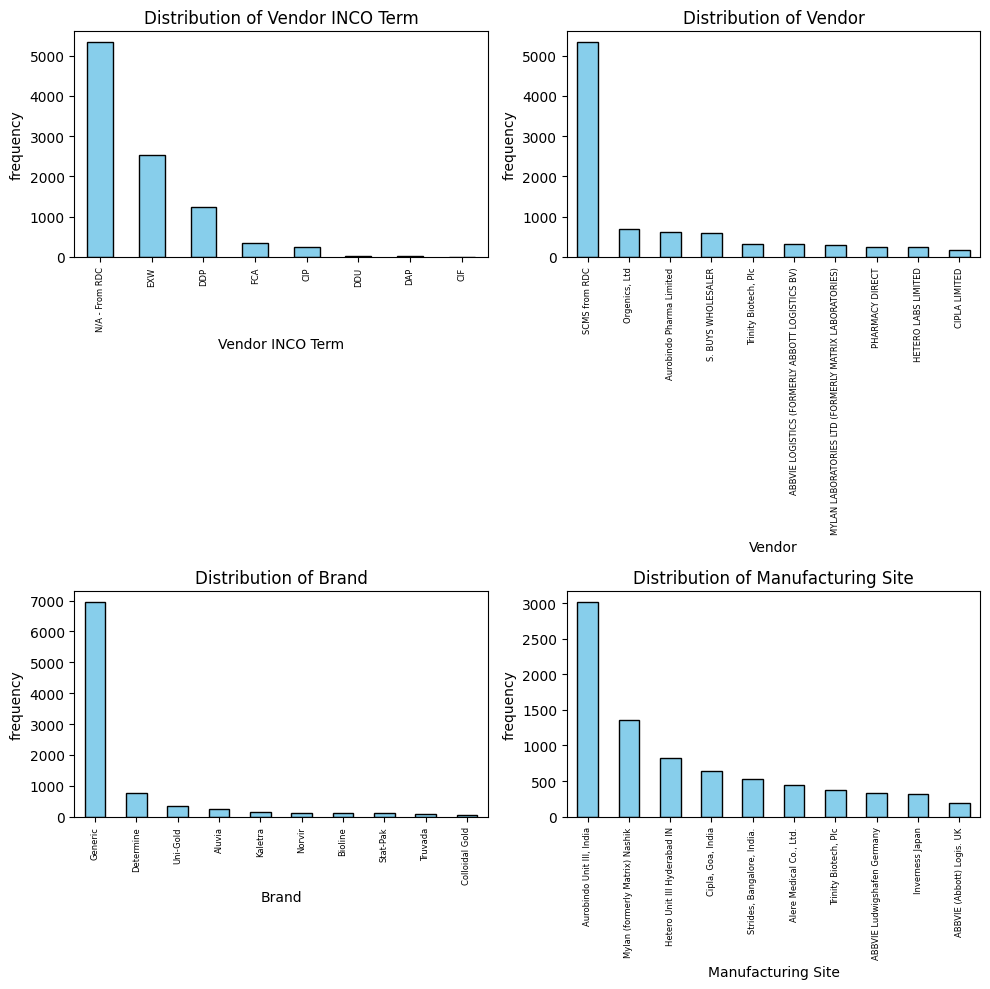

In [69]:

plt.figure(figsize = (10,10))

# Top 10 Vendor INCO Term
plt.subplot(2,2,1)
data['Vendor INCO Term'].value_counts().head(10).plot(kind = 'bar', color='skyblue', edgecolor='black')
plt.title(f"Distribution of Vendor INCO Term")
plt.xlabel('Vendor INCO Term')
plt.ylabel('frequency')
plt.xticks(rotation = 90, fontsize =6)

# Top 10 Vendors
plt.subplot(2,2,2)
data['Vendor'].value_counts().head(10).plot(kind = 'bar', color='skyblue', edgecolor='black')
plt.title(f"Distribution of Vendor")
plt.xlabel('Vendor')
plt.ylabel('frequency')
plt.xticks(rotation = 90, fontsize =6)

# Top 10 Brands
plt.subplot(2,2,3)
data['Brand'].value_counts().head(10).plot(kind = 'bar', color='skyblue', edgecolor='black')
plt.title(f"Distribution of Brand")
plt.xlabel('Brand')
plt.ylabel('frequency')
plt.xticks(rotation = 90, fontsize =6)

# Top 10 Manufacturing Site
plt.subplot(2,2,4)
data['Manufacturing Site'].value_counts().head(10).plot(kind = 'bar', color='skyblue', edgecolor='black')
plt.title(f"Distribution of Manufacturing Site")
plt.xlabel('Manufacturing Site')
plt.ylabel('frequency')
plt.xticks(rotation = 90, fontsize =6)

plt.tight_layout()
plt.show()




##### 1. Why did you pick the specific chart?

- Barplots, when you want to show a distribution of data points.
- Using subplots, above shown are four barplots.


##### 2. What is/are the insight(s) found from the chart?

**Distribution of Vendor INCO Term**
- **RDC**(Regional Distribution Center) shipping agreement has **highest number of shipments.**
- **EXW** is the second most common INCO term.

**Distribution of Vendor**
- **SCMS From RDC** vendor has highest shipments followed by **Orgenics, Ltd**.
- Most of the vendors has relatively low frequency, indicating a high reliance on **RDC**.

**Distribution of Brand**
- **Generic** brand dominates with over 7000 shipments, far surpassing others like Determine, Uni-Gold, and Aluvia.

- Most of the branded items have relatively low frequency, indicating a high reliance on **generic** products.

**Distribution of Manufacturing Site**
- **Aurobindo Unit III, India** leads with the highest number of shipments, followed by Mylan (Nasik), Hetero (Hyderabad), and Cipla (Goa).

- The top 5 manufacturers are **primarily India-based**, showing concentration in one country for production.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact**
- Heavy usage of RDCs products helps streamline supplychain, lower shipping costs.
- Recognizing high-performing vendors like **RDC and Orgenics** allows for performance tracking, and contract optimization.
- High usage of generics may reduce procurement and insurance costs.

**Risks**
- Over-reliance on RDC increases vulnerability such as warehouse issues, policy changes.
-Heavy dependence on generic brands and few Indian manufacturing sites poses a supply chain risk in case of regulatory issues, plant shutdowns, or geopolitical events.




---



## **Bivariate Analysis**

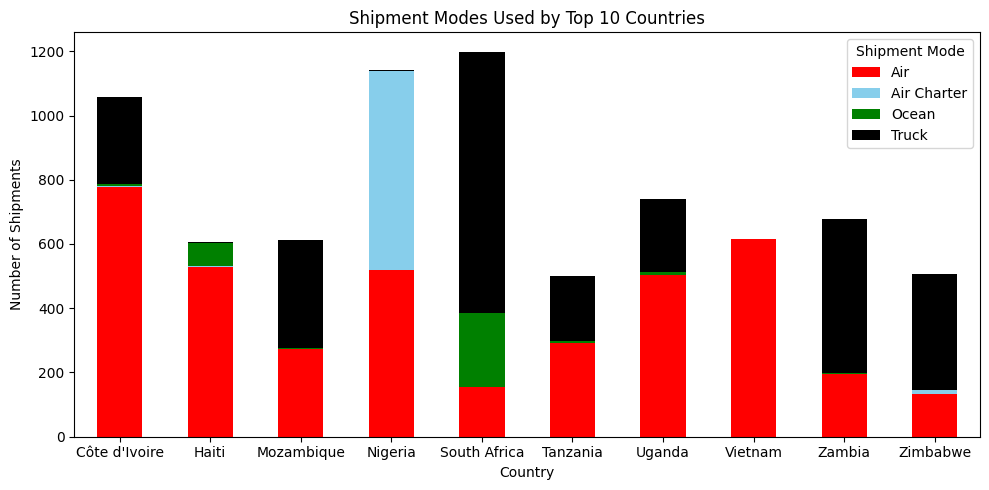

In [70]:
## What shipment modes used by top 10 Countries

top_countries = data['Country'].value_counts().head(10).sort_index().index.tolist()
filtered_data = data[data['Country'].isin(top_countries)]
df = filtered_data.groupby(['Country', 'Shipment Mode']).size().unstack(fill_value=0)

## Plot
df.plot(kind = 'bar', stacked= True,figsize=(10,5), color=['red', 'skyblue', 'green','black'])

plt.title('Shipment Modes Used by Top 10 Countries')
plt.xlabel('Country')
plt.ylabel('Number of Shipments')
plt.xticks(rotation=0)
plt.legend(title='Shipment Mode')
plt.tight_layout()
plt.show()

#### 1. Why decide to use this specific chart?

- Stacked bar charts allowing for clear and concise presentation of different components that contribute to a whole.
- Used to show % of shipment mode each top 10 countries use.

##### 2. What is/are the insight(s) found from the chart?

- All countries prefers **air** mode.
- **Cote d'lviore** prefers both **air and truck** methods.
- **Veitnam** only prefers **air** method for shipments.
- **Nigeria** prefers **air charter** and **air** method for shipment.
- No other country prefers **air charter**.
- **South Africa, Haiti** are only countries that prefer **ocean**.
- **South africa** prefer **truck** method for shipments more than others.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact**
- Country-specific shipment preferences help tailor logistics offerings (e.g., faster air shipping for urgent deliveries).

**Risk**
- If a country relies on slow/expensive modes, it could affect customer satisfaction or margins.



---



Text(0, 0.5, 'Shipment Value')

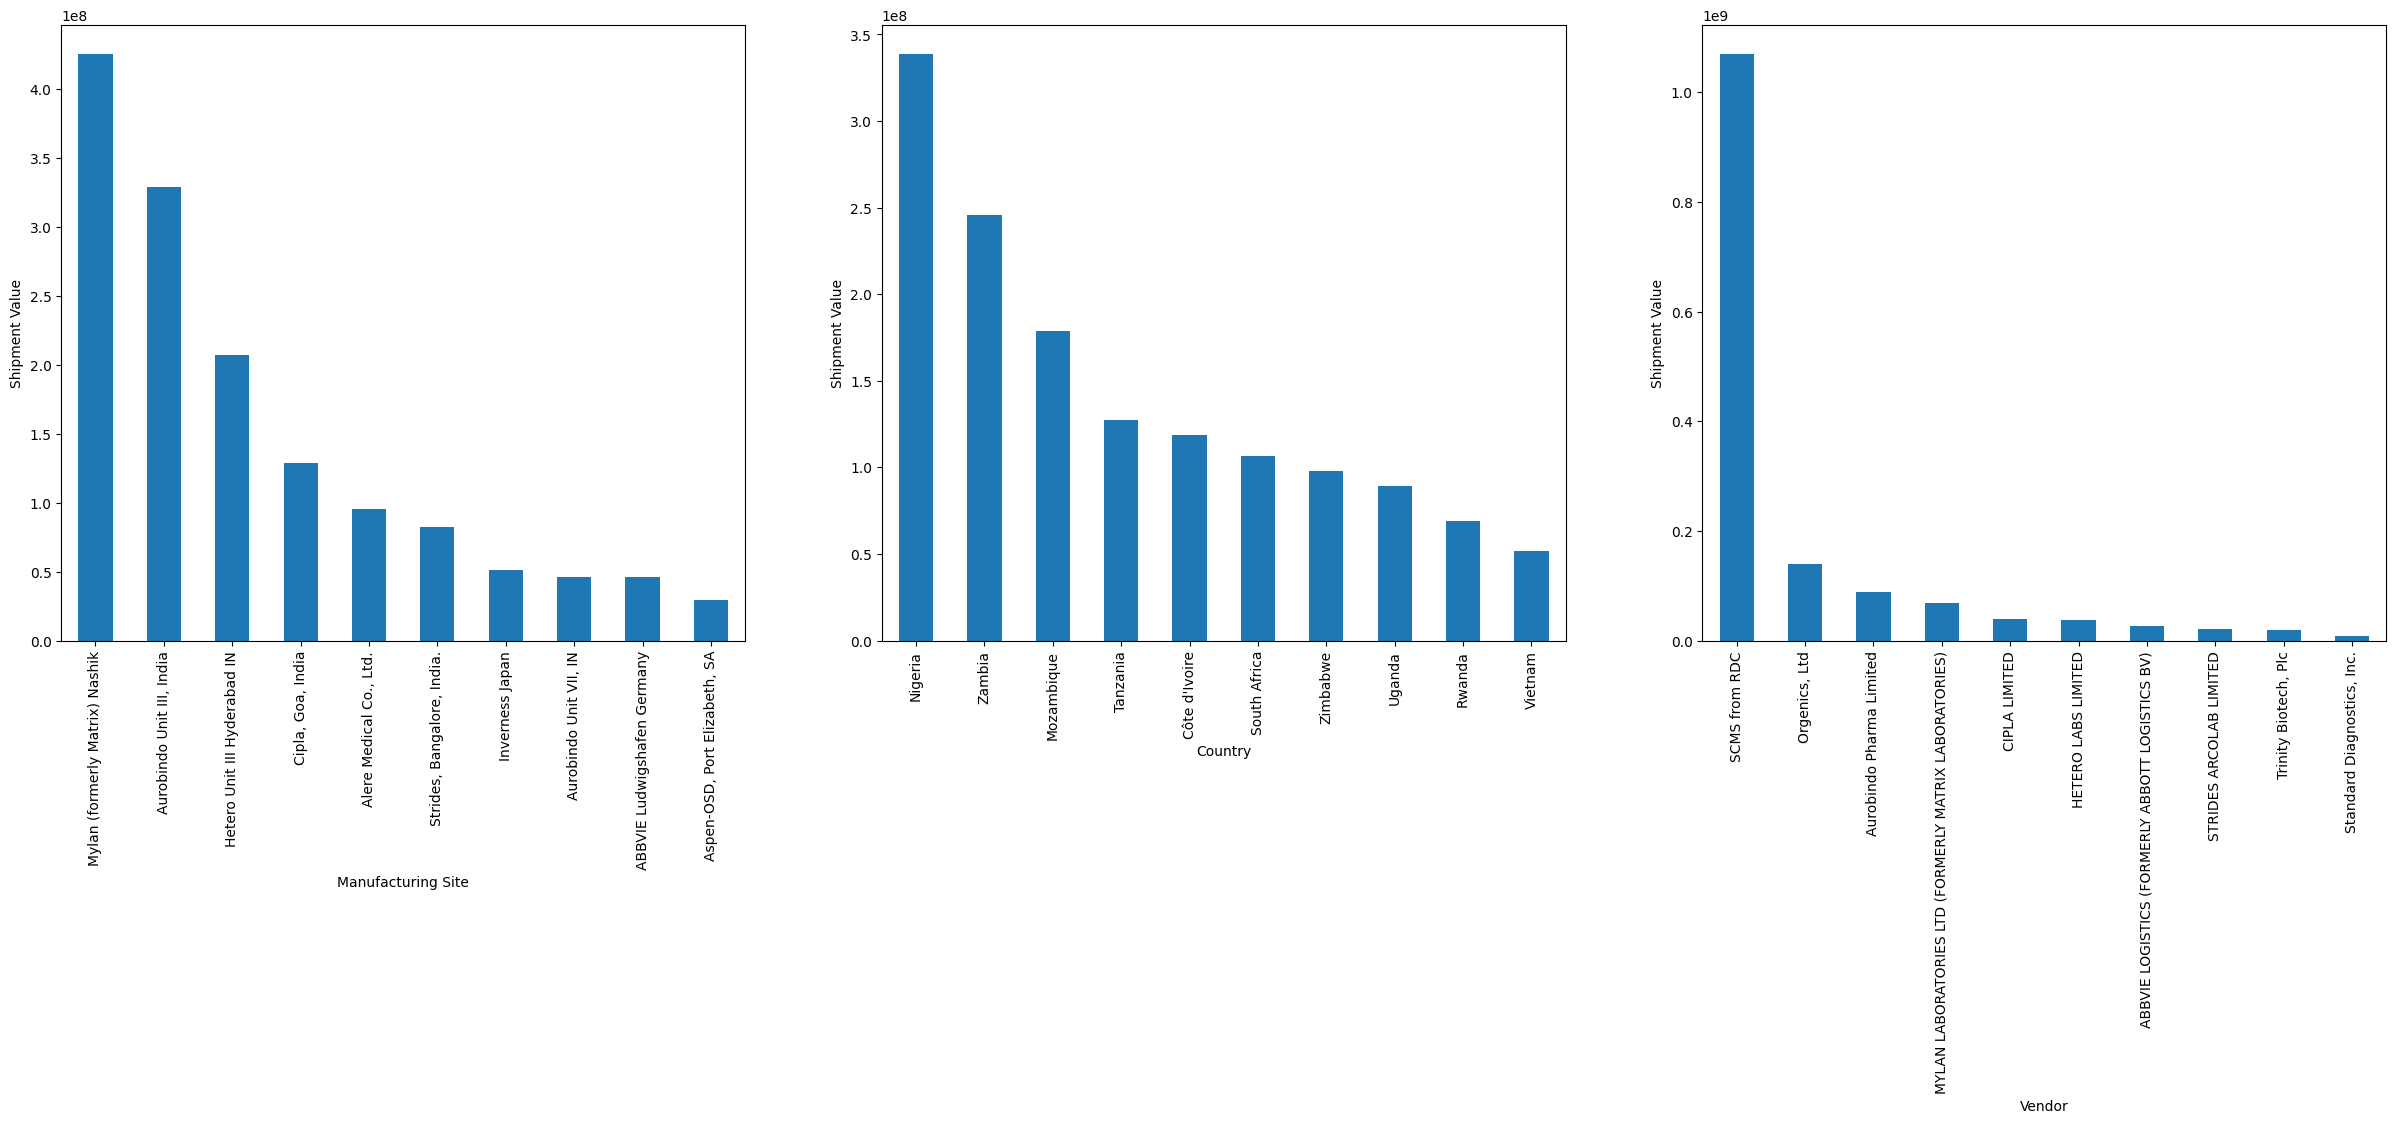

In [71]:
fig,ax=plt.subplots(1,3,figsize=(30,8))

# Top 10 Manufacturing sites by Total Price/Value of Packs produced
data.groupby(['Manufacturing Site'])['Line Item Value'].sum().nlargest(10).plot(kind='bar',ax=ax[0])
ax[0].set_ylabel('Shipment Value')

# Top 10 Countries by Total Price/Value of Packs produced
data.groupby(['Country'])['Line Item Value'].sum().nlargest(10).plot(kind='bar',ax=ax[1])
ax[1].set_ylabel('Shipment Value')

# Top 10 Vendors sites by Total Price/Value of Packs produced
data.groupby(['Vendor'])['Line Item Value'].sum().nlargest(10).plot(kind='bar',ax=ax[2])
ax[2].set_ylabel('Shipment Value')

##### What is/are the insight(s) found from the chart?

**Top 10 Manufacturing sites by Total Price/Value of Packs produced**

- **Mylan(formerly Matrix) Nashik** is top manufacturing site by total price of values packed produced.

- **Aurbindo Unit III,** India is the second top manufacturing site followed by **Hetero Unit III Hyderabad, IN.**
- Top **4** manufacturing sites are **primarly India-based**.

**Top 10 Countries by Total Price/Value of Packs produced**
- **Nigeria** has highest shipment value.
- **Zambia** and **Mozambique** has second most highest shipment value after Nigeria.

- Most of the countries have similar shipment value such as Tanzania, Cote d'lvoire, South africa, Zimbabwe, Uganda, Rwanda and Veitnam.

**Top 10 Vendors sites by Total Price/Value of Packs produced**

- Vendor **RDC(Regional Distribution Center)** has highest shipment value compared to other vendors.

- Most of the vendors have very low shipment value.

#####  Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact**
- Heavy usage of RDCs products helps streamline supplychain, lower shipping costs.
- Recognizing high-performing vendors like RDC and Orgenics allows for performance tracking, and contract optimization.


**Risks**
- Over-reliance on RDC increases vulnerability such as warehouse issues, policy changes.
- Overdependence on a few countries poses risk if trade policies or demand shift.
- Heavy dependence on generic brands and few Indian manufacturing sites poses a supply chain risk in case of regulatory issues, plant shutdowns, or geopolitical events.



---



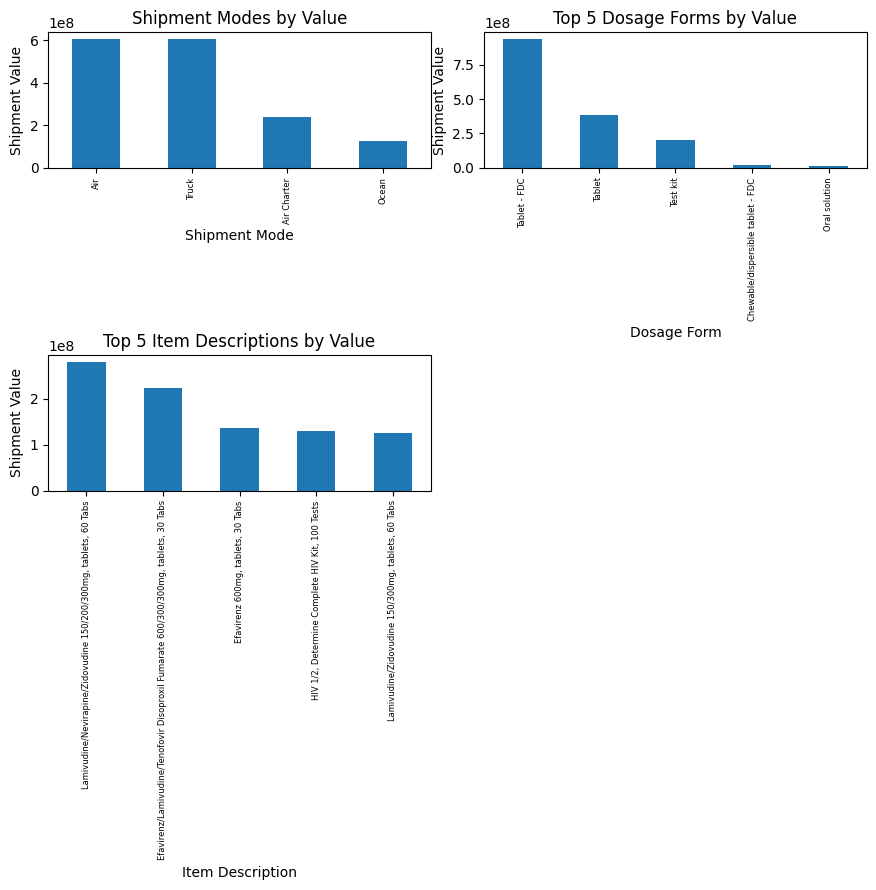

In [72]:
plt.figure(figsize = (9,9))
plt.subplot(2,2,1)

# Top 5 Shipment Modes by Line item Value
df = data.groupby(['Shipment Mode'])['Line Item Value'].sum().nlargest(5)
df.plot(kind = 'bar')
plt.title(f"Shipment Modes by Value")
plt.xlabel('Shipment Mode')
plt.xticks(fontsize = 6)
plt.ylabel('Shipment Value')

# Top 5 Dosage Form by Line item Value
plt.subplot(2,2,2)
df1 = data.groupby(['Dosage Form'])['Line Item Value'].sum().nlargest(5)
df1.plot(kind = 'bar')
plt.title(f"Top 5 Dosage Forms by Value")
plt.xlabel('Dosage Form')
plt.xticks(fontsize = 6)
plt.ylabel('Shipment Value')

# Top 5 Item Description by Line item Value
plt.subplot(2,2,3)
df1 = data.groupby(['Item Description'])['Line Item Value'].sum().nlargest(5)
df1.plot(kind = 'bar')
plt.title(f"Top 5 Item Descriptions by Value")
plt.xlabel('Item Description')
plt.xticks(fontsize = 6)
plt.ylabel('Shipment Value')

plt.tight_layout()
plt.show()

**Bar charts** are perfect for **comparing numerical values across categories**.
- Shipment modes by Line iTem Value
- Top 5 Dosage forms by Line item Value
- Top 5 Item Description by Line item Value

##### 2. What is/are the insight(s) found from the chart?

**Shipment Modes by value**

- **Air and Truck dominate**, each with a shipments value around 6x10^8, making them the most relied-upon modes.

- **Air Charter and Ocean** follow with comparatively **lower values**.

**Dosage Forms by Value**
- **Tablet -FDC** lead the pack, boosting a shipment value of about 8x10^8.

- **Regular Tablets, chewable/dispensible tablets F/C, and oral Solution** trail behind.

**Item Description by Value**

- The top product is **Lamivudine/Nevirapine/Zidovudine 150/200/300mg Tablets (60 Tabs)**, with a value nearing 2.5x10^8.

- Other highly valuable items include Efavirenz/Lamivudine/Tenofovir Tablets and HIV 1/2 Determine Complete Tests.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact**
- Focusing on Air and Truck modes, which have the highest shipment values could **reduce costs and improve delivery times**.

- Tablets FDC being the highest-valued dosage form indicates a strong market demand. **Increasing production or marketing efforts** for this form could further boost profitability.

- The top items, like Lamivudine/Nevirapine/Zidovudine Tablets, have considerable shipment values. Ensuring **consistent quality and availability of these products** could strengthen customer loyalty and revenue.


**Risks**
- **Air Charter and Ocean** have significantly lower values compared to other modes. **Overinvestment or inefficiencies** in these channels could potentially lead to **financial strain**.

- If resources are spread thin across **lower-performing dosage forms**, like oral solutions, without addressing demand gaps, it could result in **wasteful expenditures.**



---



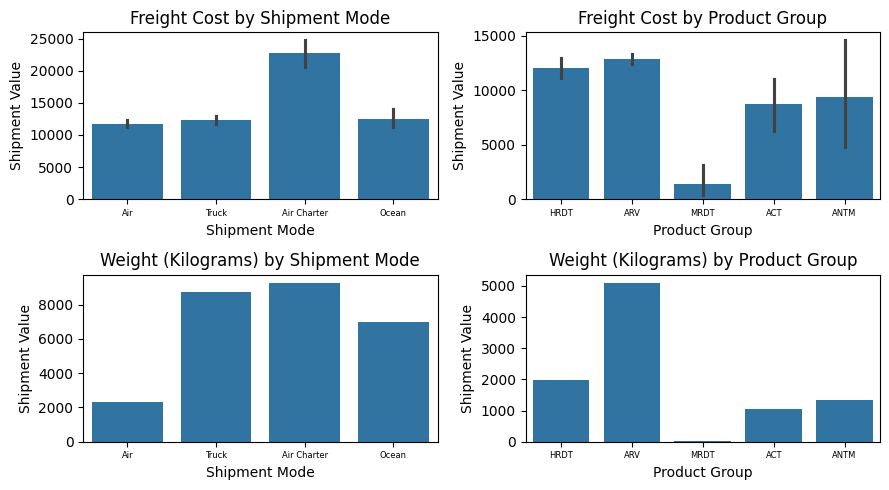

In [73]:
plt.figure(figsize = (9,5))


## FREIGHT COST
plt.subplot(2,2,1)
sns.barplot(data, x= 'Shipment Mode', y = 'Freight Cost (USD)')
plt.title(f"Freight Cost by Shipment Mode")
plt.xlabel('Shipment Mode')
plt.xticks(fontsize = 6)
plt.ylabel('Shipment Value')

plt.subplot(2,2,2)
sns.barplot(data, x= 'Product Group', y = 'Freight Cost (USD)')
plt.title(f"Freight Cost by Product Group")
plt.xlabel('Product Group')
plt.xticks(fontsize = 6)
plt.ylabel('Shipment Value')


## WEIGHT (KG)
plt.subplot(2,2,3)
sns.barplot(data, x= 'Shipment Mode', y = 'Weight (Kilograms)',errorbar = None)
plt.title(f"Weight (Kilograms) by Shipment Mode")
plt.xlabel('Shipment Mode')
plt.xticks(fontsize = 6)
plt.ylabel('Shipment Value')

plt.subplot(2,2,4)
sns.barplot(data, x= 'Product Group', y = 'Weight (Kilograms)', estimator="mean",errorbar = None)
plt.title(f"Weight (Kilograms) by Product Group")
plt.xlabel('Product Group')
plt.xticks(fontsize = 6)
plt.ylabel('Shipment Value')


plt.tight_layout()
plt.show()

**Bar charts** are perfect for comparing numerical values across categories.
- Freight Cost by Shipment Mode
- Freight Cost by Product Group
- Weight (Kilograms) by Shipment Mode
- Weight (Kilograms) by Product Group

##### 2. What is/are the insight(s) found from the chart?

**Freight Cost by Shipment Mode**

- Despite **lower line item values** and **minimum number of shipments**, **Air charter and ocean** have **higher freight costs** shows these modes are critical for specialized or **high-priority shipments**.

- **Air and Truck** have lower freight costs and highest volume of shipments.

**Weight (Kilograms) by Shipment Mode**

- **Air charter and Truck** carries highest weight(kg).
- Despite **highest** number of shipments **air** mode carries **minimum weight**.

**Freight Cost by Product Group**

- **ARV and HRDT** being the top contributors suggest prioritizing these groups.
- Low performing groups are **MRDT and ACT**.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact**
- Leveraging these insights, businesses can optimize use and negotiate better rates.
- Focusing resources on ARVs, in particular, might unlock growth.

**Risks**
- Modes like **Air Charter come with high freight costs**, which might **reduce overall profitability**. Excessive reliance without efficiency improvements could lead to financial stress.
- If **investment isn't adjusted for lower-performing categories** like MRDT and ACT, it could lead to **waste or margin pressure**.



---



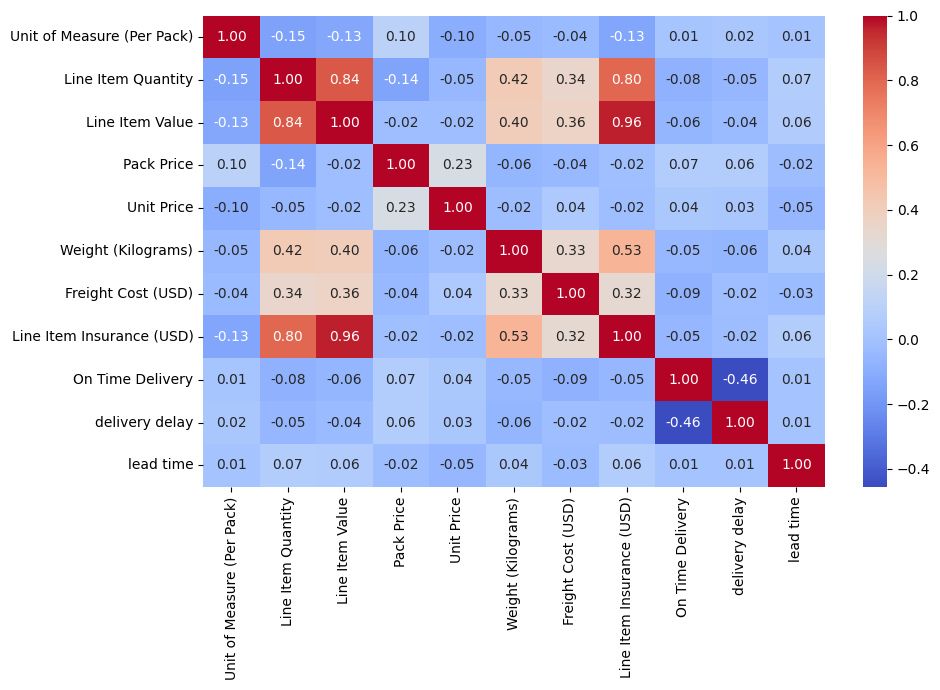

In [74]:
# Heatmap
num_columns = [ 'Unit of Measure (Per Pack)',
       'Line Item Quantity', 'Line Item Value', 'Pack Price', 'Unit Price',
       'Weight (Kilograms)', 'Freight Cost (USD)', 'Line Item Insurance (USD)',
       'On Time Delivery', 'delivery delay', 'lead time']

correlation = data[num_columns].corr()

plt.figure(figsize = (10,7))
sns.heatmap(correlation, fmt = '.2f',annot = True, cmap = 'coolwarm')
plt.tight_layout()
plt.show()

- **Heatmaps** are used to show relationships between two variables, one plotted on each axis.

#### 2. What is/are the insight(s) found from the chart?

Correlation between

- **Line Item Quantity ~ Line Item Value** = 0.84 (Positive Correlation)

- **Line Item Quantity ~ Line Item Insurance (USD)** = 0.80 (Positive Correlation)

- **Line Item Value ~ Line Item Insurance (USD)** = 0.96 (Positive Correlation)

- **On time delivery ~ delivery delay** = -0.46 (Negative Correlation)



---



Managed By
PMO - US                     0.878327
South Africa Field Office    0.982456
Name: On Time Delivery, dtype: float64


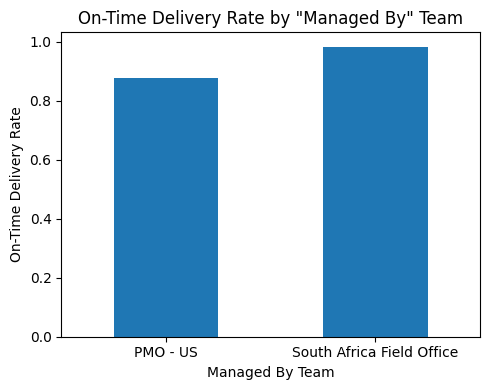

In [75]:
# Are shipments managed by specific teams (e.g., PMO – US) more likely to be delivered on time?
on_time_delivery_by_team = data.groupby('Managed By')['On Time Delivery'].mean()

print(on_time_delivery_by_team)

# Create a bar plot to visualize the on-time delivery rate for each team.
plt.figure(figsize=(5, 4))
on_time_delivery_by_team.plot(kind='bar')
plt.xlabel('Managed By Team')
plt.ylabel('On-Time Delivery Rate')
plt.title('On-Time Delivery Rate by "Managed By" Team')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


- **Barplot** shows shipments managed by specific teams (e.g., PMO – US) more likely to be delivered on time.

##### 2. What is/are the insight(s) found from the chart?

- The **South Africa Field Office excels in on-time delivery rates**, achieving an impressive **0.982456**, outperforming **PMO - US (0.878327)**.
- However, **South Africa Field Office manages only 0.587% of the total operations**, as depicted in the pie chart.

- **PMO - US manages 99.4% of the operations,** yet its on-time delivery rate **lags behind** the **South Africa Field Office**.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact**
-The South Africa Field Office exhibits exceptional delivery performance despite managing a smaller share of operations. Leveraging its practices across teams could drive better outcomes, boosting overall efficiency and reducing delays.

**Risks**
-  Inefficiencies could harm customer trust and impact profitability. Overinvestment here might result in diminishing returns.

- PMO - US handles the bulk of operations but delivers lower on-time rates compared to the South Africa Field Office. Without redistribution or efficiency measures, operational bottlenecks could lead to reduced customer satisfaction and increased costs.



---



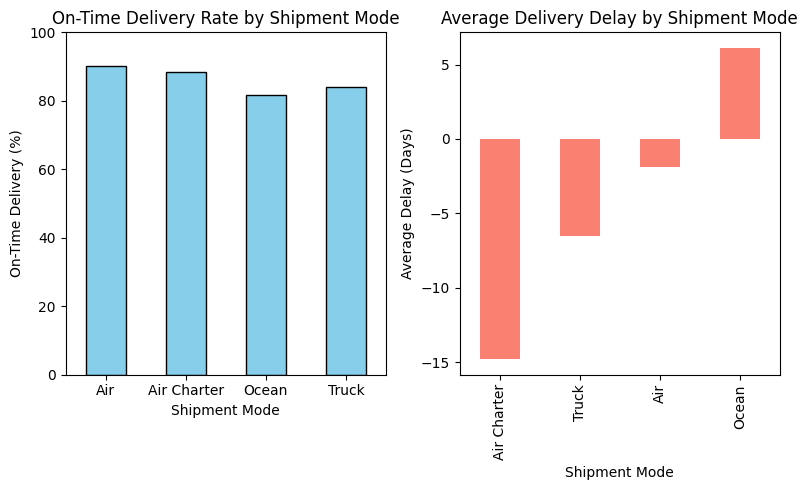

In [76]:
# Does the mode of shipment (air, ocean, etc.) affect delivery performance?

delivery_performance_by_mode = data.groupby('Shipment Mode')['On Time Delivery'].mean()

delivery_performance_by_mode = delivery_performance_by_mode * 100

# On-Time Delivery Rate by Shipment Mode
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
delivery_performance_by_mode.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('On-Time Delivery Rate by Shipment Mode')
plt.ylabel('On-Time Delivery (%)')
plt.xlabel('Shipment Mode')
plt.xticks(rotation=0)
plt.yticks(range(0,110,20))

# Average Delivery Delay by Shipment Mode
plt.subplot(1,2,2)
avg_delay = data.groupby('Shipment Mode')['delivery delay'].mean().sort_values()

avg_delay.plot(kind='bar', color='salmon', figsize=(8,5))
plt.title('Average Delivery Delay by Shipment Mode')
plt.ylabel('Average Delay (Days)')

plt.tight_layout()
plt.show()

We analyzed the relationship between shipment modes and delivery performance using two metrics:
- On-Time Delivery Rate
- Average Delivery Delay in Days

##### 2. What is/are the insight(s) found from the chart?

**On-Time Delivery Rates**
- Both shipment modes **Air and Air Charter** boast high on-time delivery rates of about 90%, making them reliable options for time-sensitive shipments.

- **Ocean and Truck** modes have lower on-time delivery rates (around 80%), which may require intervention to improve consistency.

**Average Delivery Delays**
- Air Charter and Truck modes deliver early (Air Charter by 15 days, Truck by 10 days).


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact**

- Improved customer satisfaction with reliable delivery planning.

**Risk**

- Potential cost trade-offs when choosing speed over budget (e.g., air is costlier but faster).



---



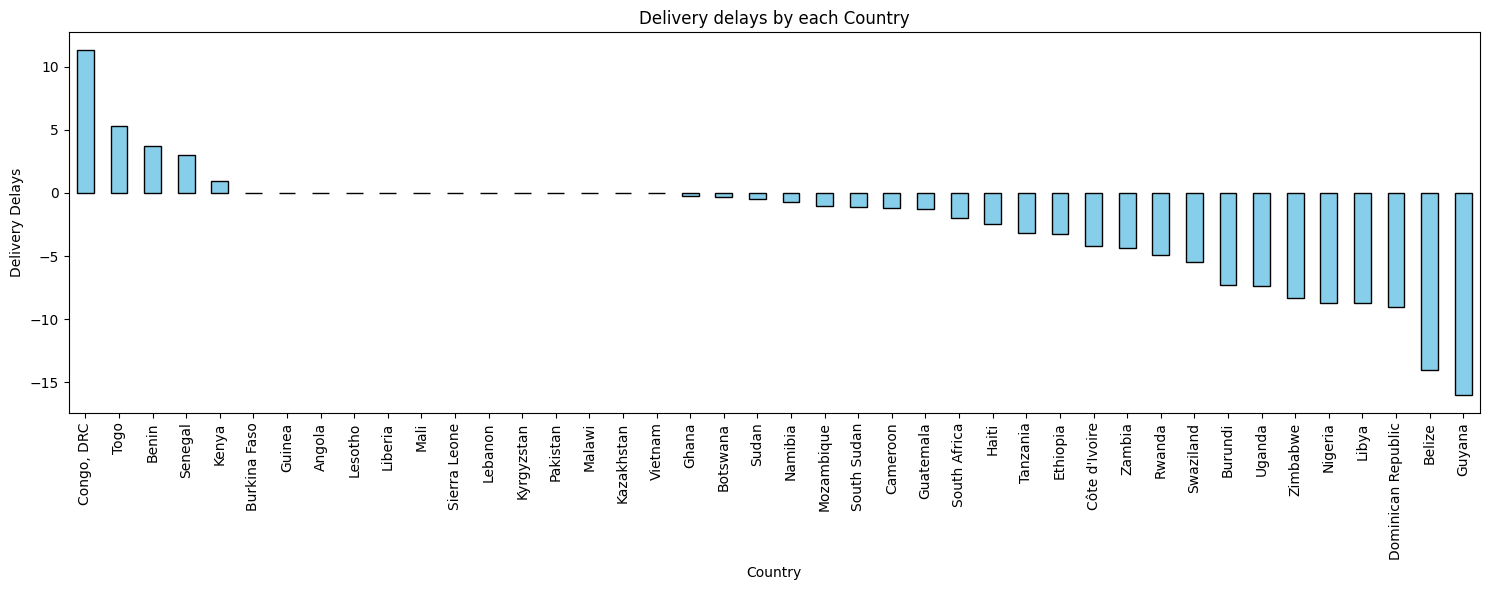

In [77]:
# Do certain countries face more frequent delays?

delay_by_country = data.groupby('Country')['delivery delay'].mean().sort_values(ascending = False)

plt.figure(figsize=(15,6))

delay_by_country.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Delivery delays by each Country')
plt.ylabel('Delivery Delays')
plt.xlabel('Country')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


- Barplot shows which the certain countries face more frequent delays and by how many.

#### 2.What are the insights?


- **Congo. DRC, Togo, Benim, Sengal, Kenga** have deliver items beyond Scheduled delivered date.

- Countries **from Burkina Faso to Ghana** in above barplot shows that these countries delivered items to client on scheduled delivered date.

- **Guyana, Belize, Dominican Republic, libya Nigeria, Zimbabwe, Uganda, Burundi, Swaziland, Rwanda** deliver items to client 15 days before scheduled delivered date.



---



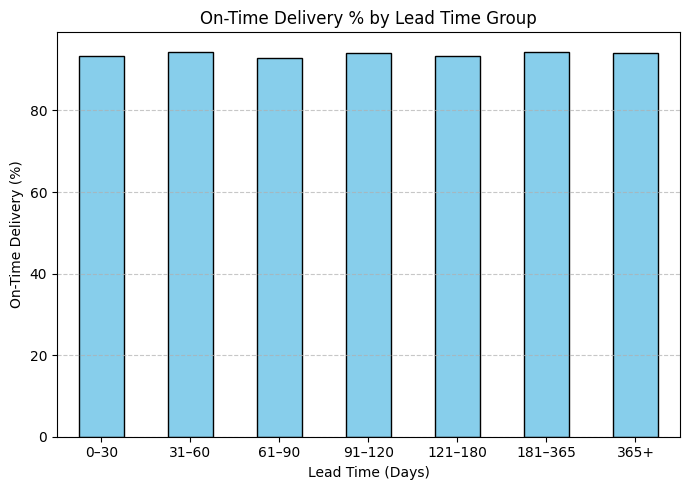

In [78]:
# Does the time gap between the PO Sent to Vendor Date and the Scheduled Delivery Date influence delivery performance?

# Create bins for lead time
bins = [0, 30, 60, 90, 120, 180, 365, data['lead time'].max()]
labels = ['0–30', '31–60', '61–90', '91–120', '121–180', '181–365', '365+']
data['Lead Time Group'] = pd.cut(data['lead time'], bins=bins, labels=labels)

lead_time_perf = data.groupby('Lead Time Group')['On Time Delivery'].mean() * 100

# Plot
plt.figure(figsize=(7,5))
lead_time_perf.plot(kind='bar', color='Skyblue', edgecolor='black')
plt.title('On-Time Delivery % by Lead Time Group')
plt.ylabel('On-Time Delivery (%)')
plt.xlabel('Lead Time (Days)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()



- **Barplot** shows the time gap between the PO Sent to Vendor Date and the Scheduled Delivery Date influence delivery performance

##### 2. What is/are the insight(s) found from the chart?

- On-time delivery is **consistently high** across lead time ranges.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact**

- Efficient planning & delivery even at short lead times shows operational excellence.

**Risk**

- If on-time rates plateau even with long lead times, it might suggest inefficiencies or lost optimization potential.



---



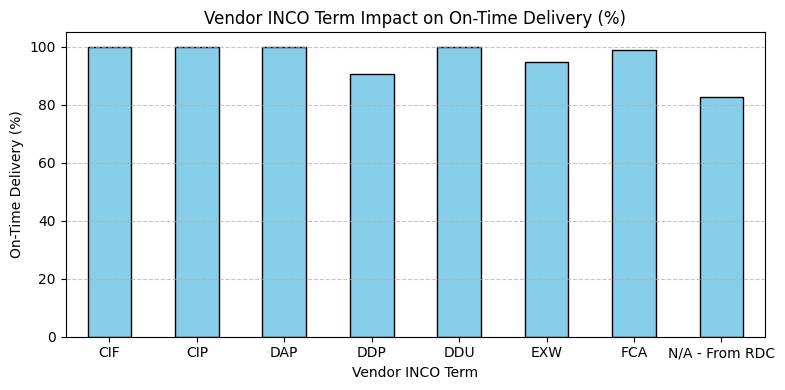

In [79]:
# Does the type of INCO term used impact vendor delivery performance?

inco_term_impact_vendor_delivery_performance = data.groupby('Vendor INCO Term')['On Time Delivery'].mean() * 100

# Plot
plt.figure(figsize=(8,4))
inco_term_impact_vendor_delivery_performance.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Vendor INCO Term Impact on On-Time Delivery (%)')
plt.ylabel('On-Time Delivery (%)')
plt.xlabel('Vendor INCO Term')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

- **Barplot** shows the type of INCO term used impact vendor delivery performance

##### 2. What is/are the insight(s) found from the chart?

- Vendor INCO terms **CIF, CIP, DAP, DDU, FCA** have 100% on time delivery rate.

- Whereas, **DDP, EXW, From RDC** have on time delivery rates above **80% but less than 90%.**

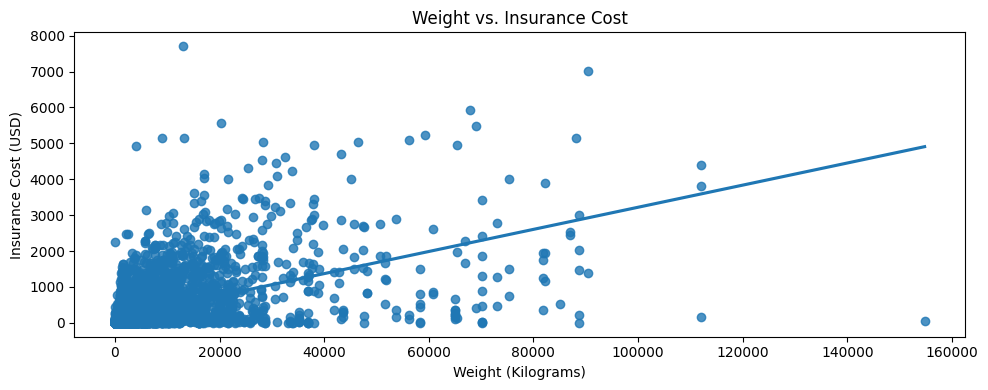

In [82]:
# Are shipments with higher weights more likely to incur higher insurance costs (Line Item Insurance)?

# Plot
plt.figure(figsize=(10,4))
sns.regplot(x = data['Weight (Kilograms)'], y= data['Line Item Insurance (USD)'], ci = None)
plt.title('Weight vs. Insurance Cost')
plt.xlabel('Weight (Kilograms)')
plt.ylabel('Insurance Cost (USD)')

plt.tight_layout()
plt.show()

- **Scatterplot** shows the relationship between weight of items and insurance cost.

#### 2. What are the insights?

- **Heavier items** generally incur **higher insurance costs.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact**
- Justifies higher charges or tiered insurance pricing—helps improve **cost allocation models.**

**Risk**
- If lighter items still incur high insurance, could reflect over-insurance or data entry issues.

In [81]:
correlation = data['Weight (Kilograms)'].corr(data['Line Item Insurance (USD)'])
print(f"Correlation between Weight and Insurance Cost: {correlation:.2f}")


Correlation between Weight and Insurance Cost: 0.53


- This shows that as the **weight of the shipment increases, line item insurance cost also increases.**




---



## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

- Use **air freight for high-value and time-sensitive items**, and **sea freight for bulk, low-value items** to optimize cost-efficiency.

- **Diversify vendor base to reduce dependency on a limited number of suppliers**, especially RDCs.

- **Regularly review insurance policies** to ensure they align with shipment weight and value trends.

- **Monitor compliance with international INCO terms and vendor agreements** to ensure consistency and accountability.

- Reallocate management responsibilities to increase the South Africa Field Office's scope, leveraging its efficiency.

- **Increase investment in ARV product groups** and **dosage forms like Tablets FDC** to capitalize on their market demand.

- Ensure consistent quality and availability for leading products to maintain customer loyalty.

- **Fine-tune early delivery schedules to align with customer needs**, preventing logistical disruptions.

- **Shift resources away from underperforming shipment modes and dosage forms unless demand improves.**




# **Conclusion**

This analysis provided a comprehensive overview of the pharmaceutical shipment operations, uncovering critical insights into logistics performance, vendor reliability, shipment modes, and insurance cost behavior. Key findings show that:

- Air freight is often used for high-value shipments, while RDC-driven fulfillment dominates overall operations.

- The business heavily depends on a few vendors and manufacturing sites, which introduces both efficiency and risk.

- Lead time does not significantly influence delivery performance, indicating a well-optimized supply chain process.

- There is a positive correlation between shipment weight and insurance cost, reinforcing the need for strategic insurance planning.

These insights enable the organization to make informed decisions on shipment strategy, vendor diversification, cost optimization, and risk mitigation. By leveraging these data-driven recommendations, the client can enhance supply chain efficiency, ensure timely delivery, and strengthen overall operational performance.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***